In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import pylab
import requests
import json

In [3]:
data_2017 = os.path.join("../Resources", "2017.csv")
data_2017 = pd.read_csv(data_2017)
cost = os.path.join('../Resources', 'cost_of_living_state.csv')
cost_living = pd.read_csv(cost)
data_2017.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,023 - CRANIOTOMY W MAJOR DEVICE IMPLANT OR ACU...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,28,117117.79,25823.71,24057.39
1,025 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,32,98357.56,20688.34,19791.41
2,027 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,11,69153.55,11811.18,8194.36
3,037 - EXTRACRANIAL PROCEDURES W MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,12,100427.33,19134.00,18154.00
4,038 - EXTRACRANIAL PROCEDURES W CC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,17,58199.47,8519.47,6714.88


In [4]:
enroll_data = os.path.join('../Resources', 'Medicare_Enrollment.csv')
enrollees = pd.read_csv(enroll_data)

In [5]:
enrollees_df = pd.DataFrame(enrollees)
enrollees_df[["Original Medicare", 
           "Medicare Advantage & Other Health Plans"]] = enrollees_df[[ 
                                                        "Original Medicare", 
                                                        "Medicare Advantage & Other Health Plans"]].apply(pd.to_numeric)
enrollees_df.head()

,State,Total,Original Medicare,Medicare Advantage & Other Health Plans
0,Alabama,935026,568207,366819
1,Alaska,80134,78805,1329
2,Arizona,1122760,650109,472650
3,Arkansas,572605,436607,135999
4,California,5314498,2825802,2488697


In [6]:
enrollees_df['Percentage of Medicare Advantage'] = round((enrollees_df['Medicare Advantage & Other Health Plans'] / 
                                                   enrollees_df['Total']) * 100, 1)
enrollees_df.head()

,State,Total,Original Medicare,Medicare Advantage & Other Health Plans,Percentage of Medicare Advantage
0,Alabama,935026,568207,366819,39.2
1,Alaska,80134,78805,1329,1.7
2,Arizona,1122760,650109,472650,42.1
3,Arkansas,572605,436607,135999,23.8
4,California,5314498,2825802,2488697,46.8


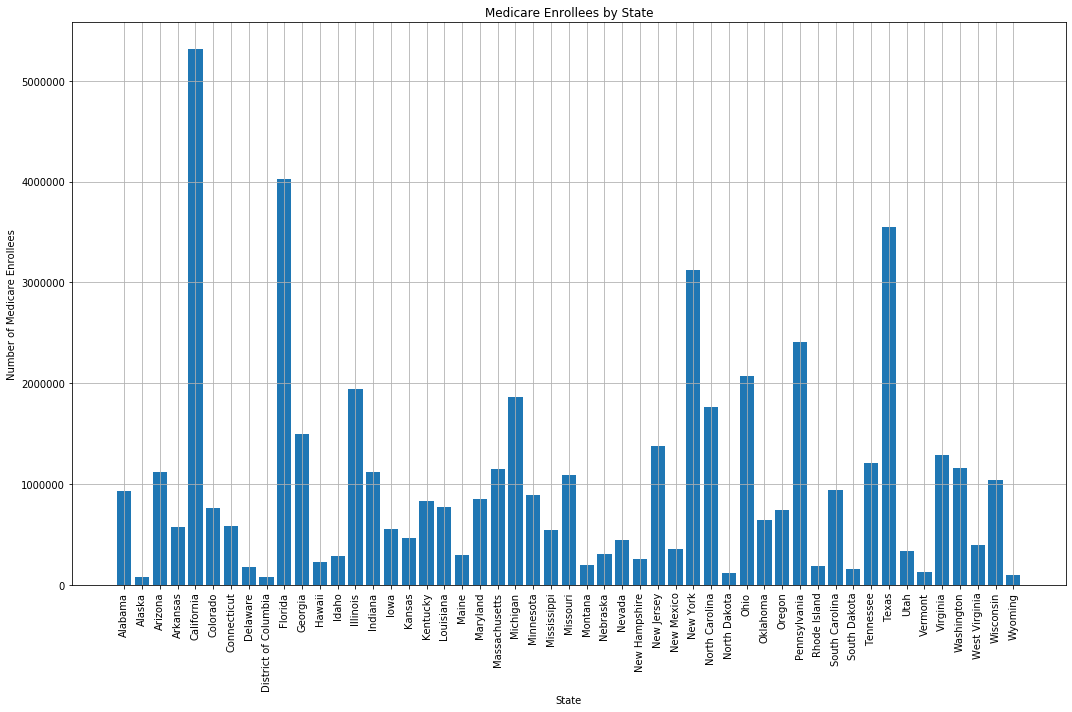

In [7]:
names = []
for name in enrollees["State"]: 
    names.append(name)
#chart showing how many Medicare recipients per state
plt.figure(figsize=(15,10))
x_axis = np.arange(len(enrollees_df["State"]))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, names, rotation="vertical")
plt.bar(x_axis, enrollees_df["Total"])
plt.grid()
plt.xlabel("State")
plt.ylabel("Number of Medicare Enrollees")
plt.title("Medicare Enrollees by State")
plt.tight_layout()
# plt.savefig("Per Capita Average Total Payments by State")

In [26]:
us_state_abbrev = [{
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}]

abbrevs_df = pd.DataFrame(us_state_abbrev).T
abbrevs_df = abbrevs_df.reset_index().rename(columns={0: 'provider_state', 'index':'State'})

,State,provider_state
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [9]:
cost_enrollees_merge = pd.merge(cost_living, enrollees_df, how='outer', on='State')
cost_enrollees_merge.head()

,costIndex,State,costRank,groceryCost,housingCost,utilitiesCost,transportationCost,miscCost,Total,Original Medicare,Medicare Advantage & Other Health Plans,Percentage of Medicare Advantage
0,1,Mississippi,86.1,91.6,70.1,89.1,89.2,91.4,545769,446980,98789,18.1
1,2,Arkansas,86.9,92.0,73.9,91.8,83.6,85.6,572605,436607,135999,23.8
2,3,Oklahoma,87.0,95.4,71.9,94.1,89.5,93.2,646237,518215,128021,19.8
3,4,Missouri,87.1,96.6,70.6,99.6,87.3,95.7,1092124,713966,378158,34.6
4,5,New Mexico,87.5,100.9,77.7,87.9,91.6,100.1,358531,224594,133937,37.4


In [10]:
cost_abbrev = pd.merge(cost_enrollees_merge, abbrevs_df, how='left')
cost_abbrev.head()

,costIndex,State,costRank,groceryCost,housingCost,utilitiesCost,transportationCost,miscCost,Total,Original Medicare,Medicare Advantage & Other Health Plans,Percentage of Medicare Advantage,provider_state
0,1,Mississippi,86.1,91.6,70.1,89.1,89.2,91.4,545769,446980,98789,18.1,MS
1,2,Arkansas,86.9,92.0,73.9,91.8,83.6,85.6,572605,436607,135999,23.8,AR
2,3,Oklahoma,87.0,95.4,71.9,94.1,89.5,93.2,646237,518215,128021,19.8,OK
3,4,Missouri,87.1,96.6,70.6,99.6,87.3,95.7,1092124,713966,378158,34.6,MO
4,5,New Mexico,87.5,100.9,77.7,87.9,91.6,100.1,358531,224594,133937,37.4,NM


In [11]:
sorted_df = cost_abbrev.sort_values(['provider_state'])
sorted_df = sorted_df.drop(columns=['costIndex', 'State'])
sorted_df.head()

,costRank,groceryCost,housingCost,utilitiesCost,transportationCost,miscCost,Total,Original Medicare,Medicare Advantage & Other Health Plans,Percentage of Medicare Advantage,provider_state
44,129.9,134.2,133.9,154.2,130.8,150.9,80134,78805,1329,1.7,AK
10,89.3,97.4,71.5,103.3,88.6,90.8,935026,568207,366819,39.2,AL
1,86.9,92.0,73.9,91.8,83.6,85.6,572605,436607,135999,23.8,AR
23,97.0,96.9,91.7,107.4,109.6,94.7,1122760,650109,472650,42.1,AZ
48,151.7,121.4,227.3,117.7,138.9,114.5,5314498,2825802,2488697,46.8,CA


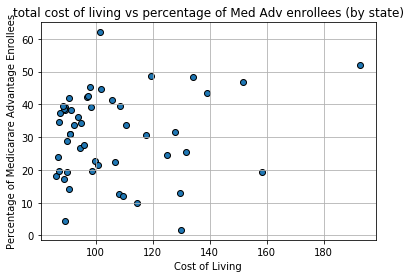

In [12]:
#set up scatter plot to show relationship between housing and total cost of living- strong correlation
plt.scatter(sorted_df['costRank'], sorted_df['Percentage of Medicare Advantage'], edgecolor='k')
plt.grid(True)
plt.title('total cost of living vs percentage of Med Adv enrollees (by state)')
plt.xlabel('Cost of Living')
plt.ylabel('Percentage of Medicarare Advantage Enrollees')

#save and then show chart
# plt.savefig('avgpaymentvscostliving.png')
plt.show()

In [13]:
medadvcost = sorted_df[['costRank', 'Percentage of Medicare Advantage']]
medadvcost.corr()

,costRank,Percentage of Medicare Advantage
costRank,1.000000,0.124048
Percentage of Medicare Advantage,0.124048,1.000000


In [14]:
#work on this later

# for state in cost_living['State']:
#     for name in abbrevs_df['State']:
#         if state == name:
#             cost_living['State'] = abbrevs_df.loc['Abbreviation']
            
# cost_living

In [15]:
data_2017.columns = data_2017.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [16]:
data_2017

,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region_hrr_description,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments
0,023 - CRANIOTOMY W MAJOR DEVICE IMPLANT OR ACU...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,28,117117.79,25823.71,24057.39
1,025 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,32,98357.56,20688.34,19791.41
2,027 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,11,69153.55,11811.18,8194.36
3,037 - EXTRACRANIAL PROCEDURES W MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,12,100427.33,19134.00,18154.00
4,038 - EXTRACRANIAL PROCEDURES W CC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,17,58199.47,8519.47,6714.88
5,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,41,41130.56,5925.95,4808.00
6,054 - NERVOUS SYSTEM NEOPLASMS W MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,14,31897.86,6849.79,6195.79
7,056 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,21,43028.05,9857.05,8936.71
8,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,47,25434.17,6124.51,4936.53
9,"062 - ISCHEMIC STROKE, PRECEREBRAL OCCLUSION O...",10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,17,59503.82,10002.00,8773.29


In [17]:
data_2017 = data_2017[["provider_state", "provider_name", "total_discharges", "average_covered_charges", "average_total_payments", "average_medicare_payments"]]

In [18]:
data_2017["average_consumer_payments"] = data_2017["average_total_payments"] - data_2017["average_medicare_payments"]

C:\Users\mdutt\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
data_2017.head()

,provider_state,provider_name,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,average_consumer_payments
0,AL,SOUTHEAST ALABAMA MEDICAL CENTER,28,117117.79,25823.71,24057.39,1766.32
1,AL,SOUTHEAST ALABAMA MEDICAL CENTER,32,98357.56,20688.34,19791.41,896.93
2,AL,SOUTHEAST ALABAMA MEDICAL CENTER,11,69153.55,11811.18,8194.36,3616.82
3,AL,SOUTHEAST ALABAMA MEDICAL CENTER,12,100427.33,19134.00,18154.00,980.00
4,AL,SOUTHEAST ALABAMA MEDICAL CENTER,17,58199.47,8519.47,6714.88,1804.59


In [44]:
#url for a dataset comparing hospital charges and outcomes for 4 different categories
base_url = "https://data.medicare.gov/resource/2kat-xip9.json?"
states = abbrevs_df['provider_state'].tolist()

test_data = requests.get(base_url).json()
test_data

[{'provider_id': '230269',
  'hospital_name': 'BEAUMONT HOSPITAL, TROY',
  'address': '44201 DEQUINDRE ROAD',
  'city': 'TROY',
  'state': 'MI',
  'zip_code': '48085',
  'county_name': 'OAKLAND',
  'phone_number': '2489648800',
  'measure_name': 'Payment for heart attack patients',
  'measure_id': 'PAYM_30_AMI',
  'category': 'Less Than the National Average Payment',
  'denominator': '650',
  'payment': '$21,878',
  'lower_estimate': '$20,808',
  'higher_estimate': '$23,014',
  'value_of_care_display_name': 'Value of Care Heart Attack measure',
  'value_of_care_display_id': 'MORT_PAYM_30_AMI',
  'value_of_care_category': 'Average Mortality and Lower Payment',
  'measure_start_date': '2015-07-01T00:00:00.000',
  'measure_end_date': '2018-06-30T00:00:00.000',
  'location_city': 'TROY',
  'location_address': '44201 DEQUINDRE ROAD',
  'location_zip': '48085',
  'location_state': 'MI'},
 {'provider_id': '261318',
  'hospital_name': 'SALEM MEMORIAL DISTRICT HOSPITAL',
  'address': 'PO BOX 77

In [43]:
outcomes = []

for state in states:
    print(f"Getting info for the state of {state}")
    query_url = base_url + 'state=' + state
    outcomes_data = requests.get(url)
    outcomes_json = outcomes_data.json()
    for item in outcomes_json:
        outcomes.append((outcomes_json['state'], outcomes_json['hospital_name'], 
                         outcomes_json['zip_code'], outcomes_json['county_name'], 
                         outcomes_json['value_of_care_display_id'], outcomes_json['value_of_care_category']))

Getting info for the state of AL


TypeError: list indices must be integers or slices, not str

In [ ]:
#clean data by removing invalid results, etc

In [20]:
state_grouped = data_2017.groupby("provider_state").sum()

In [21]:
state_grouped["per capita average total payments"] = state_grouped["average_total_payments"]/state_grouped["total_discharges"]
state_grouped["per capita average medicare payments"] = state_grouped["average_medicare_payments"]/state_grouped["total_discharges"]
state_grouped["per capita average consumer payments"] = state_grouped["average_consumer_payments"]/state_grouped["total_discharges"]

In [22]:
state_total__payments_grouped = state_grouped["per capita average total payments"].reset_index()

In [23]:
state_total__payments_grouped = state_total__payments_grouped.sort_values("per capita average total payments", ascending=False)

In [24]:
state_total__payments_grouped.head()

,provider_state,per capita average total payments
0,AK,742.757479
11,HI,629.444775
7,DC,569.416996
4,CA,527.639260
37,OR,526.075845


In [25]:
names = []
for name in state_total__payments_grouped["provider_state"]: 
    names.append(name)

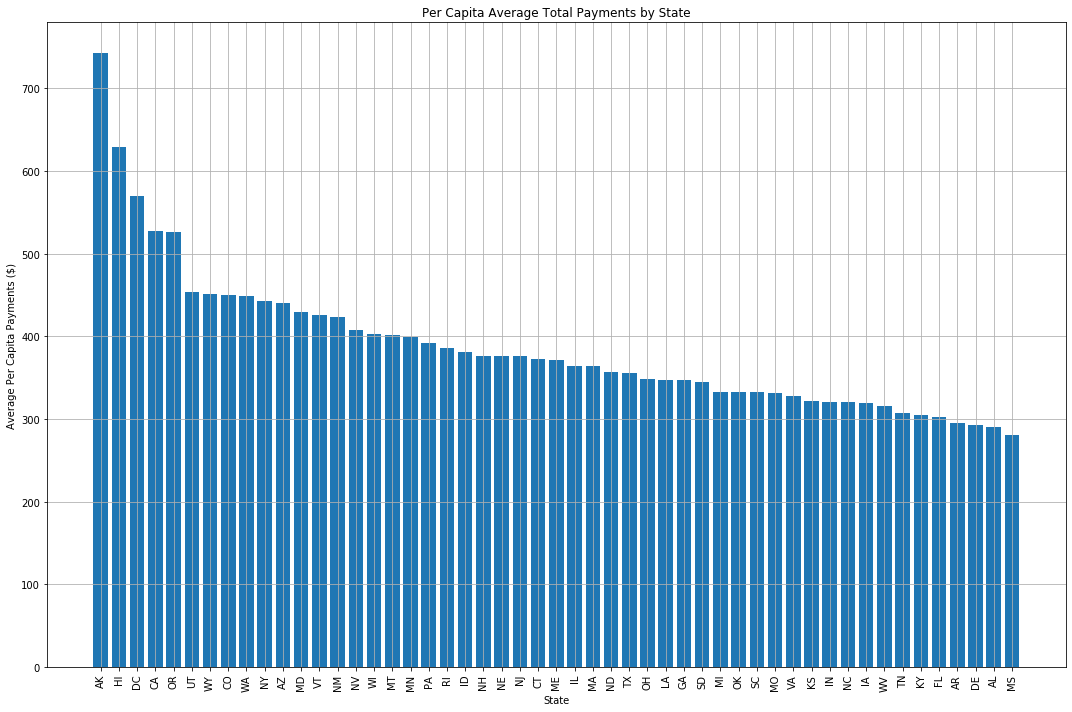

In [26]:
plt.figure(figsize=(15,10))
x_axis = np.arange(len(state_total__payments_grouped["provider_state"]))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, names, rotation="vertical")
plt.bar(x_axis, state_total__payments_grouped["per capita average total payments"])
plt.grid()
plt.xlabel("State")
plt.ylabel("Average Per Capita Payments ($)")
plt.title("Per Capita Average Total Payments by State")
plt.tight_layout()
plt.savefig("Per Capita Average Total Payments by State")

In [27]:
#merge cost of living and average payments dframes
merge_cost_average = pd.merge(state_total__payments_grouped, sorted_df, how='outer', on='provider_state')
merge_cost_average.head()

,provider_state,per capita average total payments,costRank,groceryCost,housingCost,utilitiesCost,transportationCost,miscCost,Total,Original Medicare,Medicare Advantage & Other Health Plans,Percentage of Medicare Advantage
0,AK,742.757479,129.9,134.2,133.9,154.2,130.8,150.9,80134,78805,1329,1.7
1,HI,629.444775,192.9,169.3,318.6,172.7,148.6,116.8,225191,108107,117084,52.0
2,DC,569.416996,158.4,115.5,267.0,119.7,116.6,97.3,74444,60015,14429,19.4
3,CA,527.639260,151.7,121.4,227.3,117.7,138.9,114.5,5314498,2825802,2488697,46.8
4,OR,526.075845,134.2,110.3,181.8,88.0,136.7,113.2,742426,382362,360065,48.5


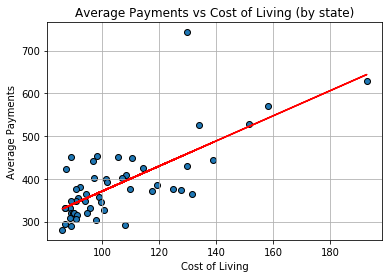

In [28]:
#set up scatter plot of average payment vs cost of living
plt.scatter(merge_cost_average['costRank'], merge_cost_average["per capita average total payments"], edgecolor='k')
plt.grid(True)
plt.title('Average Payments vs Cost of Living (by state)')
plt.xlabel('Cost of Living')
plt.ylabel('Average Payments')

z = np.polyfit(merge_cost_average['costRank'], 
               merge_cost_average["per capita average total payments"], 1)
p = np.poly1d(z)
pylab.plot(merge_cost_average['costRank'], 
           p(merge_cost_average['costRank']),"r")

#save and then show chart
plt.savefig('avgpaymentvscostliving.png')
plt.show()

In [29]:
pay_cost = merge_cost_average[['costRank', "per capita average total payments"]]

In [30]:
pay_cost.corr()

,costRank,per capita average total payments
costRank,1.000000,0.721119
per capita average total payments,0.721119,1.000000


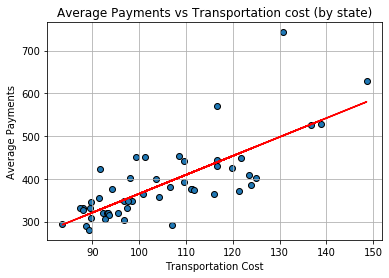

In [31]:
#set up scatter plot for transportation vs payments
plt.scatter(merge_cost_average['transportationCost'], merge_cost_average["per capita average total payments"], edgecolor='k')
plt.grid(True)
plt.title('Average Payments vs Transportation cost (by state)')
plt.xlabel('Transportation Cost')
plt.ylabel('Average Payments')

z = np.polyfit(merge_cost_average['transportationCost'], 
            merge_cost_average["per capita average total payments"], 1)
p = np.poly1d(z)
pylab.plot(merge_cost_average['transportationCost'], p(merge_cost_average['transportationCost']),"r")

#save and then show chart
plt.savefig('avgpaymentvstransportationcost.png')
plt.show()

In [32]:
transportation = merge_cost_average[["transportationCost", "per capita average total payments"]]
transportation.corr()

,transportationCost,per capita average total payments
transportationCost,1.000000,0.759425
per capita average total payments,0.759425,1.000000


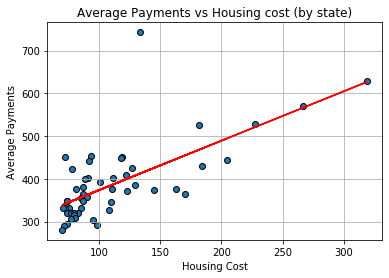

In [33]:
#set up scatter plot for housing vs payments
plt.scatter(merge_cost_average['housingCost'], merge_cost_average["per capita average total payments"], edgecolor='k')
plt.grid(True)
plt.title('Average Payments vs Housing cost (by state)')
plt.xlabel('Housing Cost')
plt.ylabel('Average Payments')

z = np.polyfit(merge_cost_average['housingCost'], 
               merge_cost_average["per capita average total payments"], 1)
p = np.poly1d(z)
pylab.plot(merge_cost_average['housingCost'], p(merge_cost_average['housingCost']),"r")

#save and then show chart
# plt.savefig('avgpaymentvshousingcost.png')
plt.show()

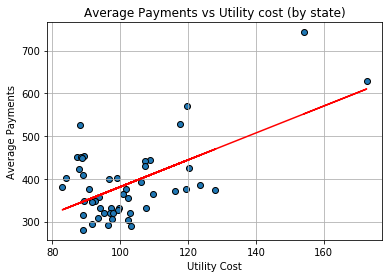

In [34]:
#set up scatter plot for utilities vs payments
plt.scatter(merge_cost_average['utilitiesCost'], merge_cost_average["per capita average total payments"], edgecolor='k')
plt.grid(True)
plt.title('Average Payments vs Utility cost (by state)')
plt.xlabel('Utility Cost')
plt.ylabel('Average Payments')

z = np.polyfit(merge_cost_average['utilitiesCost'], 
            merge_cost_average["per capita average total payments"], 1)
p = np.poly1d(z)
pylab.plot(merge_cost_average['utilitiesCost'], p(merge_cost_average['utilitiesCost']),"r")

#save and then show chart
# plt.savefig('avgpaymentvsutilitycost.png')
plt.show()

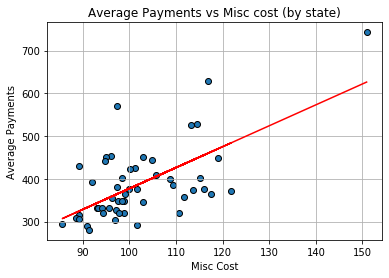

In [35]:
#set up scatter plot for misc cost vs payments
plt.scatter(merge_cost_average['miscCost'], merge_cost_average["per capita average total payments"], edgecolor='k')
plt.grid(True)
plt.title('Average Payments vs Misc cost (by state)')
plt.xlabel('Misc Cost')
plt.ylabel('Average Payments')

z = np.polyfit(merge_cost_average['miscCost'], 
            merge_cost_average["per capita average total payments"], 1)
p = np.poly1d(z)
pylab.plot(merge_cost_average['miscCost'], p(merge_cost_average['miscCost']),"r")

#save and then show chart
# plt.savefig('avgpaymentvsmisccost.png')
plt.show()

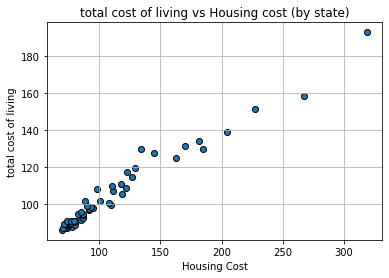

In [36]:
#set up scatter plot to show relationship between housing and total cost of living- strong correlation
plt.scatter(cost_living['housingCost'], cost_living['costRank'], edgecolor='k')
plt.grid(True)
plt.title('total cost of living vs Housing cost (by state)')
plt.xlabel('Housing Cost')
plt.ylabel('total cost of living')

#save and then show chart
# plt.savefig('avgpaymentvscostliving.png')
plt.show()

In [37]:
#housing is a large driver of cost of living
cost_housing =cost_living[['housingCost', 'costRank']]
cost_housing.corr()

,housingCost,costRank
housingCost,1.000000,0.981318
costRank,0.981318,1.000000


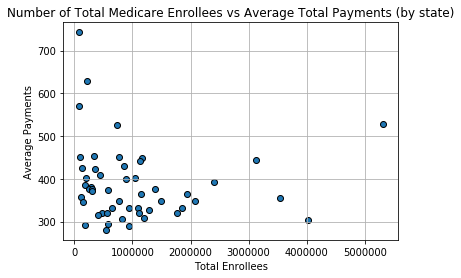

In [38]:
#set up scatter plot for number of medicare enrollees by state vs payments
plt.scatter(merge_cost_average['Total'], merge_cost_average["per capita average total payments"], edgecolor='k')
plt.grid(True)
plt.title('Number of Total Medicare Enrollees vs Average Total Payments (by state)')
plt.xlabel('Total Enrollees')
plt.ylabel('Average Payments')

#save and then show chart
plt.show()

In [39]:
#no correlation between number of Med participants in a state vs average payment in that state
tot_enrollees = merge_cost_average[['Total', "per capita average total payments"]]
tot_enrollees.corr()

,Total,per capita average total payments
Total,1.000000,-0.068178
per capita average total payments,-0.068178,1.000000


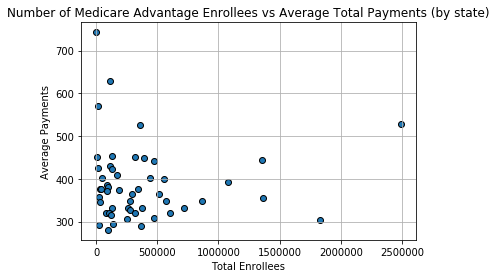

In [40]:
#set up scatter plot for number of medicare enrollees by state vs payments
plt.scatter(merge_cost_average['Medicare Advantage & Other Health Plans'], merge_cost_average["per capita average total payments"], edgecolor='k')
plt.grid(True)
plt.title('Number of Medicare Advantage Enrollees vs Average Total Payments (by state)')
plt.xlabel('Total Enrollees')
plt.ylabel('Average Payments')

#save and then show chart
# plt.savefig('avgpaymentvshousingcost.png')
plt.show()

In [41]:
#no correlation
med_advantage = merge_cost_average[['Medicare Advantage & Other Health Plans', "per capita average total payments"]]
med_advantage.corr()

,Medicare Advantage & Other Health Plans,per capita average total payments
Medicare Advantage & Other Health Plans,1.000000,0.007218
per capita average total payments,0.007218,1.000000


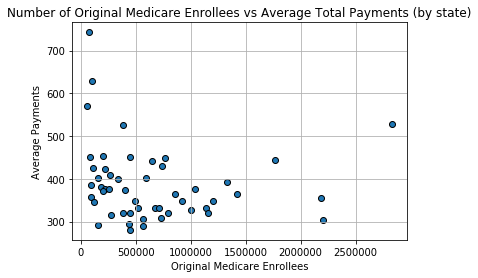

In [42]:
#set up scatter plot for number of 'original' medicare enrollees by state vs payments
plt.scatter(merge_cost_average['Original Medicare'], merge_cost_average["per capita average total payments"], edgecolor='k')
plt.grid(True)
plt.title('Number of Original Medicare Enrollees vs Average Total Payments (by state)')
plt.xlabel('Original Medicare Enrollees')
plt.ylabel('Average Payments')

# z = np.polyfit(merge_cost_average['housingCost'], 
#                merge_cost_average["per capita average total payments"], 1)
# p = np.poly1d(z)
# pylab.plot(merge_cost_average['housingCost'], p(merge_cost_average['housingCost']),"r")

#save and then show chart
# plt.savefig('avgpaymentvshousingcost.png')
plt.show()

In [43]:
original = merge_cost_average[['Original Medicare', "per capita average total payments"]]
original.corr()

,Original Medicare,per capita average total payments
Original Medicare,1.000000,-0.127307
per capita average total payments,-0.127307,1.000000


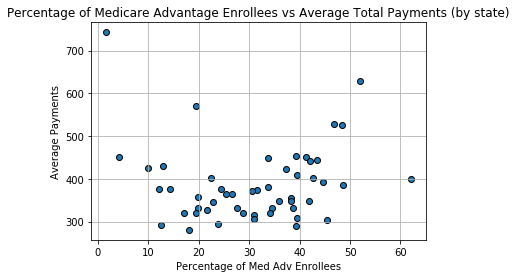

In [44]:
#set up scatter plot for percentage of medicare advantage enrollees by state vs payments
plt.scatter(merge_cost_average['Percentage of Medicare Advantage'], merge_cost_average["per capita average total payments"], edgecolor='k')
plt.grid(True)
plt.title('Percentage of Medicare Advantage Enrollees vs Average Total Payments (by state)')
plt.xlabel('Percentage of Med Adv Enrollees')
plt.ylabel('Average Payments')

#save and then show chart
# plt.savefig('avgpaymentvshousingcost.png')
plt.show()

In [45]:
#nope
med_adv = merge_cost_average[["Percentage of Medicare Advantage", "per capita average total payments"]]
med_adv.corr()

,Percentage of Medicare Advantage,per capita average total payments
Percentage of Medicare Advantage,1.000000,0.019733
per capita average total payments,0.019733,1.000000


  # Observations:
    * Alaska, Hawaii, District of Columbia, California and Oregon pay most in per capita total health payments for sample group.
    * Mississippi, Alabama and Delaware spend the least per capita
    * Alaska(most:$742 spends $480 more than Mississippi (least:$280))

In [46]:
state_medicare_grouped = state_grouped["per capita average medicare payments"].reset_index()

In [47]:
state_medicare_grouped = state_medicare_grouped.sort_values("per capita average medicare payments", ascending=False)

In [48]:
state_medicare_grouped.head()

,provider_state,per capita average medicare payments
0,AK,650.470138
11,HI,495.098695
4,CA,464.321545
37,OR,452.760314
7,DC,435.275106


In [49]:
names = []
for name in state_medicare_grouped["provider_state"]: 
    names.append(name)

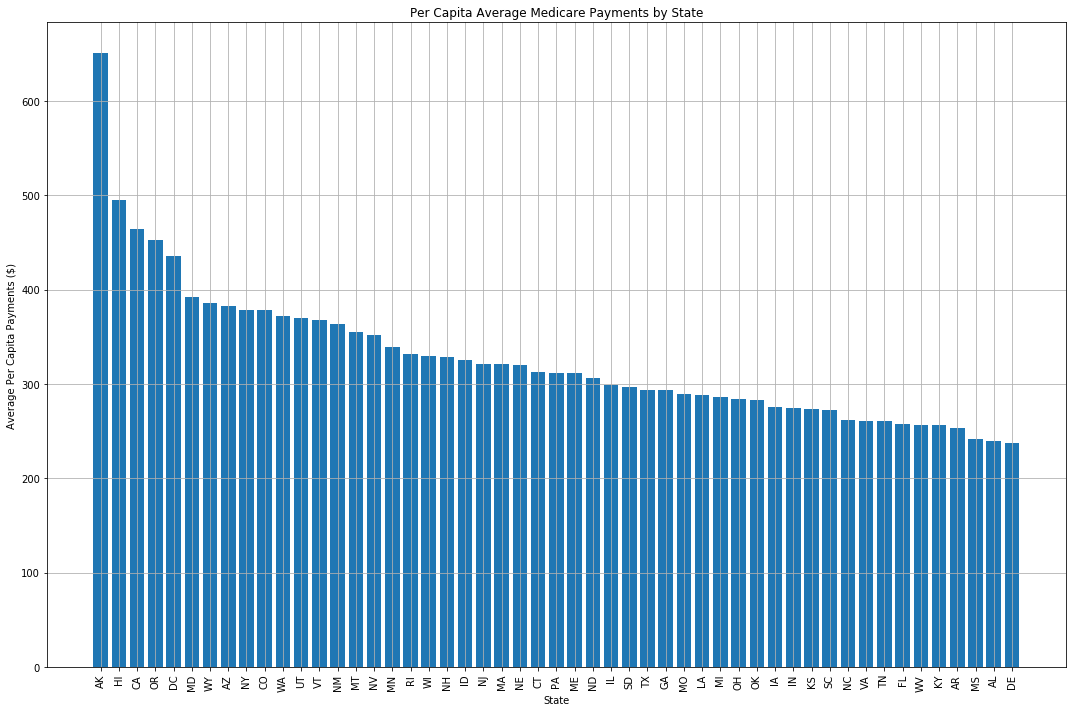

In [50]:
plt.figure(figsize=(15,10))
x_axis = np.arange(len(state_medicare_grouped["provider_state"]))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, names, rotation="vertical")
plt.bar(x_axis, state_medicare_grouped["per capita average medicare payments"])
plt.grid()
plt.xlabel("State")
plt.ylabel("Average Per Capita Payments ($)")
plt.title("Per Capita Average Medicare Payments by State")
plt.tight_layout()
plt.savefig("Per Capita Average Medicare Payments by State")

In [51]:
#merge cost of living with grouped by medicare payout df
merge_cost_average_medpay = pd.merge(state_medicare_grouped, sorted_df, how='outer', on='provider_state')
merge_cost_average_medpay.head()

,provider_state,per capita average medicare payments,costRank,groceryCost,housingCost,utilitiesCost,transportationCost,miscCost,Total,Original Medicare,Medicare Advantage & Other Health Plans,Percentage of Medicare Advantage
0,AK,650.470138,129.9,134.2,133.9,154.2,130.8,150.9,80134,78805,1329,1.7
1,HI,495.098695,192.9,169.3,318.6,172.7,148.6,116.8,225191,108107,117084,52.0
2,CA,464.321545,151.7,121.4,227.3,117.7,138.9,114.5,5314498,2825802,2488697,46.8
3,OR,452.760314,134.2,110.3,181.8,88.0,136.7,113.2,742426,382362,360065,48.5
4,DC,435.275106,158.4,115.5,267.0,119.7,116.6,97.3,74444,60015,14429,19.4


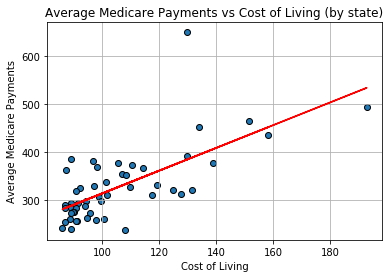

In [52]:
#set up scatter plot of medicare payments vs cost of living
plt.scatter(merge_cost_average_medpay['costRank'], merge_cost_average_medpay["per capita average medicare payments"], edgecolor='k')
plt.grid(True)
plt.title('Average Medicare Payments vs Cost of Living (by state)')
plt.xlabel('Cost of Living')
plt.ylabel('Average Medicare Payments')

z = np.polyfit(merge_cost_average_medpay['costRank'], 
            merge_cost_average_medpay["per capita average medicare payments"], 1)
p = np.poly1d(z)
pylab.plot(merge_cost_average_medpay['costRank'], p(merge_cost_average_medpay['costRank']),"r")

#save and then show chart
plt.savefig('medicarepaymentvscostliving.png')
plt.show()

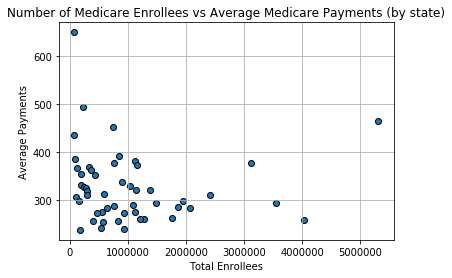

In [53]:
#set up scatter plot for number of medicare enrollees by state vs payments
plt.scatter(merge_cost_average_medpay['Total'], merge_cost_average_medpay["per capita average medicare payments"], edgecolor='k')
plt.grid(True)
plt.title('Number of Medicare Enrollees vs Average Medicare Payments (by state)')
plt.xlabel('Total Enrollees')
plt.ylabel('Average Payments')

# z = np.polyfit(merge_cost_average['housingCost'], 
#                merge_cost_average["per capita Medica payments"], 1)
# p = np.poly1d(z)
# pylab.plot(merge_cost_average['housingCost'], p(merge_cost_average['housingCost']),"r")

#save and then show chart
# plt.savefig('avgpaymentvshousingcost.png')
plt.show()

In [54]:
state_consumer_payment_grouped = state_grouped["per capita average consumer payments"].reset_index()

In [55]:
state_consumer_payment_grouped = state_consumer_payment_grouped.sort_values("per capita average consumer payments", ascending=False)

In [56]:
state_consumer_payment_grouped.head()

,provider_state,per capita average consumer payments
11,HI,134.346081
7,DC,134.141889
0,AK,92.287341
44,UT,83.676189
38,PA,80.520042


In [57]:
names = []
for name in state_consumer_payment_grouped["provider_state"]: 
    names.append(name)

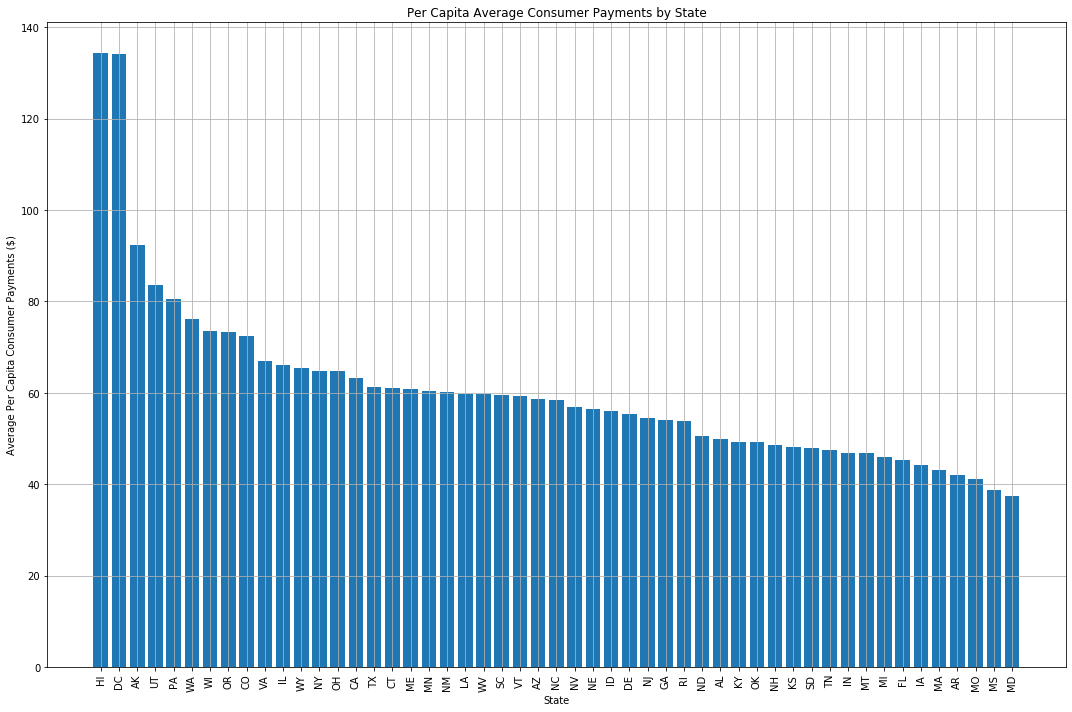

In [58]:
plt.figure(figsize=(15,10))
x_axis = np.arange(len(state_consumer_payment_grouped["provider_state"]))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, names, rotation="vertical")
plt.bar(x_axis, state_consumer_payment_grouped["per capita average consumer payments"])
plt.grid()
plt.xlabel("State")
plt.ylabel("Average Per Capita Consumer Payments ($)")
plt.title("Per Capita Average Consumer Payments by State")
plt.tight_layout()
plt.savefig("Per Capita Average Consumer Payments by State")

In [59]:
#merge cost of living with grouped by consumer payout df
merge_cost_average_consumer = pd.merge(state_consumer_payment_grouped, sorted_df, how='outer', on='provider_state')
merge_cost_average_consumer.head()

,provider_state,per capita average consumer payments,costRank,groceryCost,housingCost,utilitiesCost,transportationCost,miscCost,Total,Original Medicare,Medicare Advantage & Other Health Plans,Percentage of Medicare Advantage
0,HI,134.346081,192.9,169.3,318.6,172.7,148.6,116.8,225191,108107,117084,52.0
1,DC,134.141889,158.4,115.5,267.0,119.7,116.6,97.3,74444,60015,14429,19.4
2,AK,92.287341,129.9,134.2,133.9,154.2,130.8,150.9,80134,78805,1329,1.7
3,UT,83.676189,98.4,98.5,93.6,89.4,108.6,96.0,333828,202482,131346,39.3
4,PA,80.520042,101.7,106.9,100.8,106.0,109.5,91.9,2410301,1333311,1076990,44.7


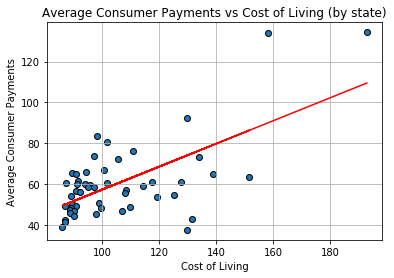

In [60]:
#set up scatter plot of consumer payments vs cost of living
plt.scatter(merge_cost_average_consumer['costRank'], merge_cost_average_consumer["per capita average consumer payments"], edgecolor='k')
plt.grid(True)
plt.title('Average Consumer Payments vs Cost of Living (by state)')
plt.xlabel('Cost of Living')
plt.ylabel('Average Consumer Payments')

z = np.polyfit(merge_cost_average_consumer['costRank'], 
                                     merge_cost_average_consumer["per capita average consumer payments"], 1)
p = np.poly1d(z)
pylab.plot(merge_cost_average_consumer['costRank'],p(merge_cost_average_consumer['costRank']),"r-")

#save and then show chart
# plt.savefig('consumerpaymentvscostliving.png')
plt.show()

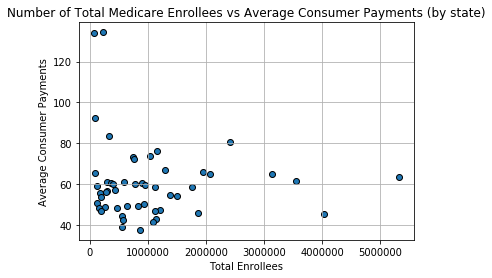

In [61]:
#set up scatter plot for number of medicare enrollees by state vs consumer payments
plt.scatter(merge_cost_average_consumer['Total'], merge_cost_average_consumer["per capita average consumer payments"], edgecolor='k')
plt.grid(True)
plt.title('Number of Total Medicare Enrollees vs Average Consumer Payments (by state)')
plt.xlabel('Total Enrollees')
plt.ylabel('Average Consumer Payments')

#save and then show chart
plt.show()

In [62]:
#no correlation
consumer = merge_cost_average_consumer[["Total", "per capita average consumer payments"]]
consumer.corr()

,Total,per capita average consumer payments
Total,1.000000,-0.087184
per capita average consumer payments,-0.087184,1.000000


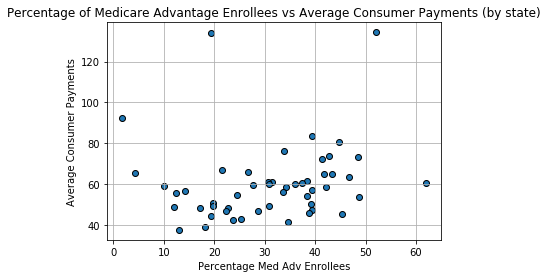

In [63]:
#set up scatter plot for percentage of medicare advatage enrollees by state vs consumer payments
plt.scatter(merge_cost_average_consumer['Percentage of Medicare Advantage'], 
            merge_cost_average_consumer["per capita average consumer payments"], edgecolor='k')
plt.grid(True)
plt.title('Percentage of Medicare Advantage Enrollees vs Average Consumer Payments (by state)')
plt.xlabel('Percentage Med Adv Enrollees')
plt.ylabel('Average Consumer Payments')

#save and then show chart
plt.show()

In [64]:
#no correlation
cons_med_adv = merge_cost_average_consumer[["Percentage of Medicare Advantage", "per capita average consumer payments"]]
cons_med_adv.corr()

,Percentage of Medicare Advantage,per capita average consumer payments
Percentage of Medicare Advantage,1.000000,0.170507
per capita average consumer payments,0.170507,1.000000


In [65]:
provider_name_grouped = data_2017.groupby("provider_name").sum()

In [66]:
provider_name_grouped.head()

,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,average_consumer_payments
provider_name,,,,,
ABBEVILLE GENERAL HOSPITAL,299,343081.44,108849.95,94973.98,13875.97
ABBOTT NORTHWESTERN HOSPITAL,11667,15208635.72,4308641.94,3864361.89,444280.05
ABILENE REGIONAL MEDICAL CENTER,1374,3786717.62,454610.80,392648.76,61962.04
ABINGTON MEMORIAL HOSPITAL,8433,12997767.53,2977841.70,2426369.23,551472.47
ABRAZO ARROWHEAD CAMPUS,2923,8671824.96,1613372.12,1479389.00,133983.12


In [67]:
provider_name_grouped["per capita average total payments"] = provider_name_grouped["average_total_payments"]/provider_name_grouped["total_discharges"]
provider_name_grouped["per capita average medicare payments"] = provider_name_grouped["average_medicare_payments"]/provider_name_grouped["total_discharges"]
provider_name_grouped["per capita average consumer payments"] = provider_name_grouped["average_consumer_payments"]/provider_name_grouped["total_discharges"]

In [68]:
provider_name_grouped.head()

,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,average_consumer_payments,per capita average total payments,per capita average medicare payments,per capita average consumer payments
provider_name,,,,,,,,
ABBEVILLE GENERAL HOSPITAL,299,343081.44,108849.95,94973.98,13875.97,364.046656,317.638729,46.407926
ABBOTT NORTHWESTERN HOSPITAL,11667,15208635.72,4308641.94,3864361.89,444280.05,369.301615,331.221556,38.080059
ABILENE REGIONAL MEDICAL CENTER,1374,3786717.62,454610.80,392648.76,61962.04,330.866667,285.770568,45.096099
ABINGTON MEMORIAL HOSPITAL,8433,12997767.53,2977841.70,2426369.23,551472.47,353.117716,287.723139,65.394577
ABRAZO ARROWHEAD CAMPUS,2923,8671824.96,1613372.12,1479389.00,133983.12,551.957619,506.120082,45.837537


In [69]:
provider_average_total_payments = provider_name_grouped["per capita average total payments"].reset_index()

In [70]:
provider_average_total_payments = provider_average_total_payments.sort_values("per capita average total payments", ascending=False).head(n=20)

In [71]:
provider_average_total_payments.head()

,provider_name,per capita average total payments
3056,"WOMANS HOSPITAL OF TEXAS,THE",5444.462727
2901,US PAIN & SPINE HOSPITAL,3140.177826
2594,STERLING SURGICAL HOSPITAL,3116.968824
1200,KAISER FOUNDATION HOSPITAL - SAN FRANCISCO,2571.798500
1655,MINIMALLY INVASIVE SURGERY HOSPITAL,2479.228056


In [72]:
names = []
for name in provider_average_total_payments["provider_name"]: 
    names.append(name)

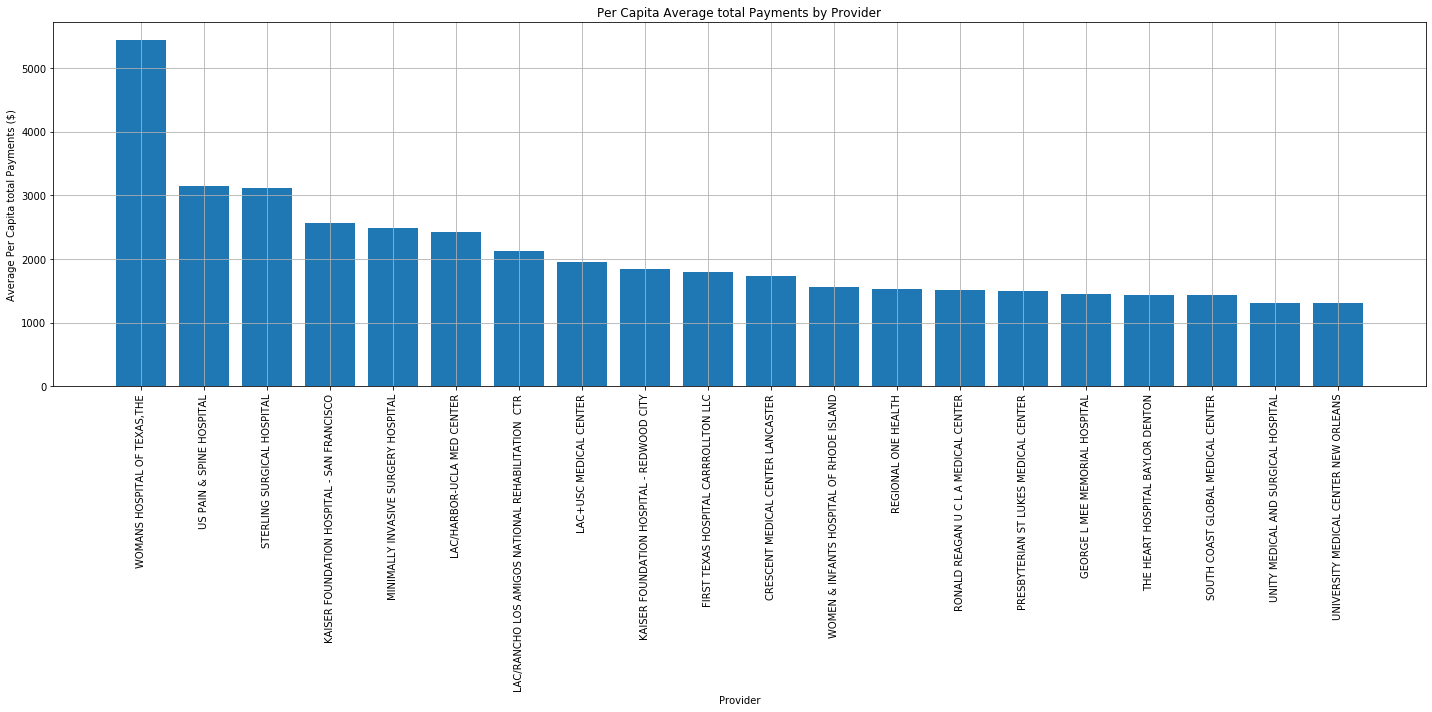

In [73]:
plt.figure(figsize=(20,10))
x_axis = np.arange(len(provider_average_total_payments["provider_name"]))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, names, rotation="vertical")
plt.bar(x_axis, provider_average_total_payments["per capita average total payments"])
plt.grid()
plt.xlabel("Provider")
plt.ylabel("Average Per Capita total Payments ($)")
plt.title("Per Capita Average total Payments by Provider")
plt.tight_layout()
plt.savefig("Per Capita Average total Payments by Provider")

In [74]:
average_covered_charges = data_2017.groupby("provider_state").sum()

In [75]:
average_covered_charges["per capita average covered charges"] = average_covered_charges["average_covered_charges"]/average_covered_charges["total_discharges"] 

In [76]:
average_covered_charges = average_covered_charges["per capita average covered charges"].reset_index()

In [77]:
average_covered_charges = average_covered_charges.sort_values("per capita average covered charges", ascending=False)

In [78]:
average_covered_charges.head()

,provider_state,per capita average covered charges
4,CA,3048.361998
0,AK,3043.830371
33,NV,2838.785136
5,CO,2459.717892
31,NJ,2288.516268


In [79]:
names = []
for name in average_covered_charges["provider_state"]: 
    names.append(name)

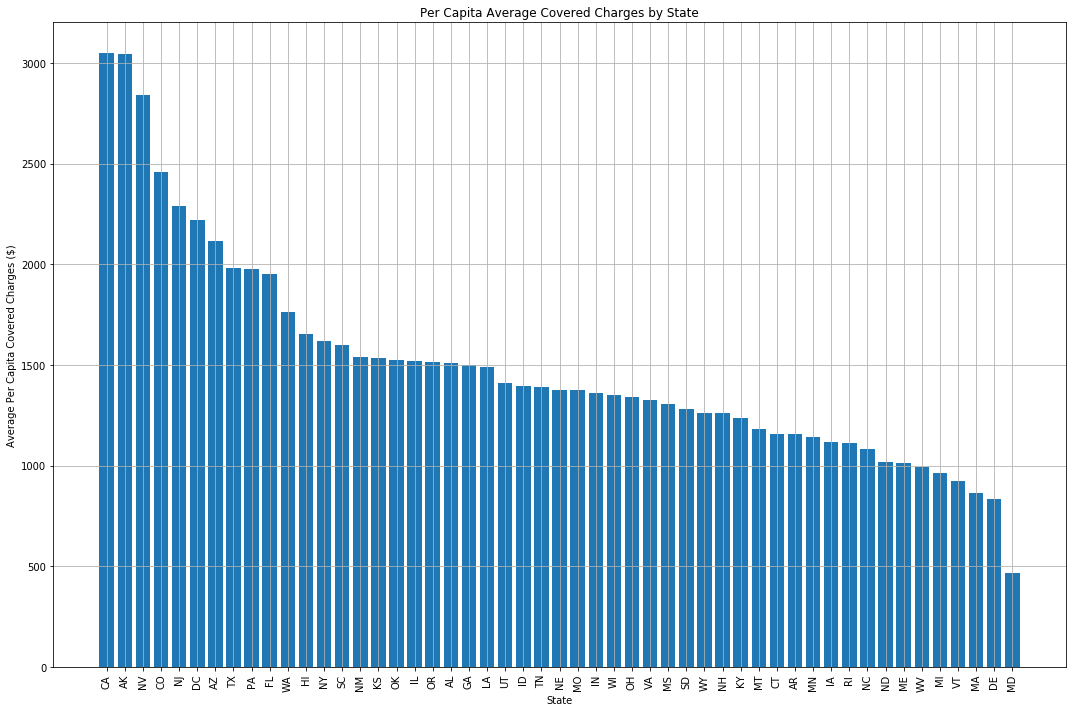

In [80]:
plt.figure(figsize=(15,10))
x_axis = np.arange(len(average_covered_charges["provider_state"]))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, names, rotation="vertical")
plt.bar(x_axis, average_covered_charges["per capita average covered charges"])
plt.grid()
plt.xlabel("State")
plt.ylabel("Average Per Capita Covered Charges ($)")
plt.title("Per Capita Average Covered Charges by State")
plt.tight_layout()
plt.savefig("Per Capita Average Covered Charges by State")

In [81]:
#merge cost of living with grouped by covered charges df
merge_cost_covered_charges = pd.merge(average_covered_charges, sorted_df, how='outer', on='provider_state')
merge_cost_covered_charges.head()

,provider_state,per capita average covered charges,costRank,groceryCost,housingCost,utilitiesCost,transportationCost,miscCost,Total,Original Medicare,Medicare Advantage & Other Health Plans,Percentage of Medicare Advantage
0,CA,3048.361998,151.7,121.4,227.3,117.7,138.9,114.5,5314498,2825802,2488697,46.8
1,AK,3043.830371,129.9,134.2,133.9,154.2,130.8,150.9,80134,78805,1329,1.7
2,NV,2838.785136,108.5,108.3,121.8,89.0,123.5,105.7,439722,266673,173049,39.4
3,CO,2459.717892,105.6,102.5,119.0,88.4,101.2,102.9,764106,448313,315793,41.3
4,NJ,2288.516268,125.1,109.5,163.1,101.6,111.1,101.7,1381564,1042780,338785,24.5


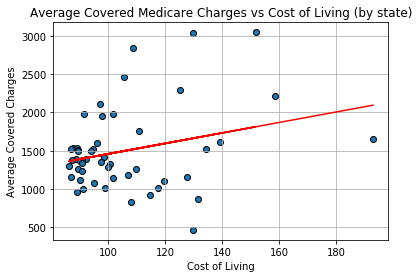

In [82]:
#set up scatter plot of covered costs vs cost of living
plt.scatter(merge_cost_covered_charges['costRank'], merge_cost_covered_charges["per capita average covered charges"], edgecolor='k')
plt.grid(True)
plt.title('Average Covered Medicare Charges vs Cost of Living (by state)')
plt.xlabel('Cost of Living')
plt.ylabel('Average Covered Charges')

z = np.polyfit(merge_cost_covered_charges['costRank'], 
            merge_cost_covered_charges["per capita average covered charges"], 1)
p = np.poly1d(z)
pylab.plot(merge_cost_average_consumer['costRank'],p(merge_cost_average_consumer['costRank']),"r")

#save and then show chart
# plt.savefig('consumerpaymentvscostliving.png')
plt.show()

In [83]:
#very weak correlation
covered = merge_cost_covered_charges[["costRank", "per capita average covered charges"]]
covered.corr()

,costRank,per capita average covered charges
costRank,1.000000,0.277134
per capita average covered charges,0.277134,1.000000


*Observation:
*For some reason Maryland has a relatively high total and medicare payments, but low on consumer payment and average covered charge.